In [1]:
import numpy as np
import matplotlib.pyplot as plt

The Stefa-Boltzmann law states that the hea flus $[j] = \mathrm{W} \mathrm{m}^{-2}$ is calculated as
\begin{equation}
j_{rad} = \varepsilon \sigma T^4
\end{equation}
where $\varepsilon \in [0, 1]$ is the emisivity of the object and $\sigma = 5.670374419 \times 10^{-8}\, \mathrm{W} \mathrm{m}^{-2} \mathrm{K}^{-4}$ ist the Stefan-Boltzmann constant.
Usin Fourier's law
\begin{equation}
j_F = -k \nabla T.
\end{equation}

For a simple 1d test case we have
\begin{align}
j_{rad} &= j_F\\
\varepsilon \sigma T^4_1 &= -k \frac{T_1 - T_0}{\Delta x}
\end{align}
which leads to
$$
\underbrace{\frac{\varepsilon \sigma}{k}}_{a} T^4_1 + T_1 = -T_0
$$

## Taylor Series
We use 
\begin{align}
j'_{rad}(T) &= \varepsilon \sigma T_0^4 + 4 \varepsilon \sigma T_0^3 (T - T_0)\\
&= \varepsilon \sigma T_0^3  \left(4 T - 3 T_0 \right)\\
&=  \underbrace{4 \varepsilon \sigma T_0^3}_{a} T - \underbrace{3 \varepsilon \sigma T_0^4}_{b} 
\end{align}
So we have
\begin{align}
j'_{rad}(T) &= j_F(T)\\
a T - b &= -\underbrace{\frac{k}{\Delta x}}_{\tilde{k}} (T - T_0)\\
T (a + \tilde{k}) &= \tilde{k} T_0 + b\\
T &= \frac{\tilde{k} T_0 + b}{a + \tilde{k}}
\end{align}

In [6]:
def calc_j_rad(T):
    sigma = 5.670374419e-8
    
    return sigma * T**4

def calc_j_rad_T(T, T0):
    sigma = 5.670374419e-8
    a = 4.0 * sigma * T0**3
    b = 3.0 * sigma * T0**4
    
    return a * T - b

def calc_j_F(T, T0, k, dx):
    return -(k/dx) * (T - T0)

def calc_T(T, T0, k, dx):
    sigma = 5.670374419e-8
    a = 4.0 * sigma * T**3
    b = 3.0 * sigma * T**4
    tk = k/dx
    
    return (tk * T0 + b) / (a + tk)

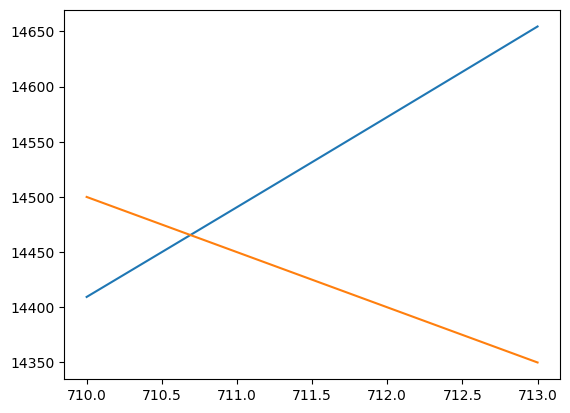

In [12]:
T0 = 1000
k = 100
dx = 2
temp = np.linspace(710, 713)
j_rad = [calc_j_rad(T) for T in temp]
j_F = [calc_j_F(T, T0, k ,dx) for T in temp]

plt.plot(temp, j_rad)
plt.plot(temp, j_F)

In [10]:
T = 100

for _ in range(10):
    Tnew = calc_T(T, T0, k ,dx)
    diff = abs(T - Tnew)/T
    T = Tnew
    print(diff, T)

8.95822871635399 995.8228716353989
0.2036114953900419 793.0618875981096
0.09339997013637713 718.9899309801473
0.011419057613241444 710.7797435349445
0.00012592693750859634 710.690237218598
1.4742581189812014e-08 710.6902267411895
1.5996679487618328e-16 710.6902267411896
1.5996679487618325e-16 710.6902267411895
1.5996679487618328e-16 710.6902267411896
1.5996679487618325e-16 710.6902267411895
